In [176]:
# https://www.kaggle.com/datasets?tags=13302-Classification

In [202]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix #혼돈행렬


In [178]:
data = pd.read_csv('./input/full_data.csv')
data


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [179]:
X = data.drop(['stroke'], axis=1)
y = data['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)


0    4733
1     248
Name: stroke, dtype: int64


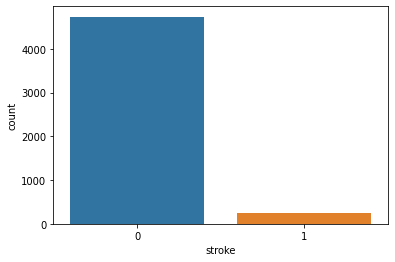

In [180]:
sns.countplot(x='stroke', data=data)
print(data['stroke'].value_counts())

In [181]:
percent_no_stroke = (4733 / data.shape[0]) * 100
percent_yes_stroke = (248 / data.shape[0]) * 100
# print(percent_no_stroke,percent_yes_stroke)

stroke_1_len = len(data[data['stroke'] == 1])
# print(stroke_1_len)

stroke_0_lnd = data[data['stroke'] == 0].index
# print(stroke_0_lnd)

random_stroke = np.random.choice(stroke_0_lnd, stroke_1_len, replace=False)

print(len(random_stroke))


248


<AxesSubplot:xlabel='stroke', ylabel='count'>

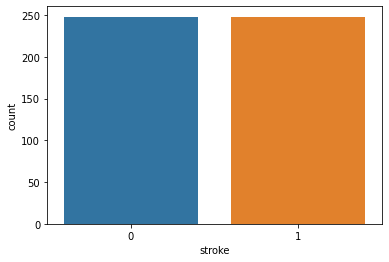

In [182]:
stroke_1_ind = data[data['stroke']==1].index
under_samp_ind = np.concatenate([stroke_1_ind,random_stroke])
under_sam = data.loc[under_samp_ind]
sns.countplot(x='stroke',data=under_sam)

In [183]:
columns = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke']
df_final = pd.get_dummies(under_sam[columns]) #문자 데이터 가변수 설정
df_stroke_final = df_final['stroke']
df_final_model = df_final.drop(['stroke'], axis=1)

In [184]:
X_train, X_test, y_train, y_test = train_test_split(df_final_model,df_stroke_final, test_size=0.20, shuffle=True)

In [196]:
from sklearn.ensemble import RandomForestClassifier

def rf(X_train, Y_train, n_estimators=250):
 rndforest = RandomForestClassifier(n_estimators=n_estimators, n_jobs=-1)
 rndforest.fit(X_train, Y_train)
 return rndforest

In [200]:
random_forest_en = rf(X_train, y_train.ravel(), n_estimators=250)


print("TRAINING ACCURACY:", random_forest_en.score(X_train, y_train))
print("VALIDATION ACCURACY", random_forest_en.score(X_test, y_test))

TRAINING ACCURACY: 1.0
VALIDATION ACCURACY 0.75


In [221]:
from matplotlib import pyplot as plt
import itertools #효율적인 루핑을 위한 반복자

def plot_confusion_matrix(model, X, y, class_names, file_name,
                          normalize=False,
                          title='CONFUSION MATRIX',
                          cmap=plt.cm.Greys):

    y_pred = model.predict(X)
    cnf_matrix  = confusion_matrix(y, y_pred)

    if normalize:
        cnf_matrix = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
        print("CONFUSION MATRIX")
    else:
        print('CONFUSION MATRIX')
    
    plt.imshow(cnf_matrix, interpolation='nearest', cmap=cmap)
    plt.title('CONFUSION MATRIX')
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=90)
    plt.yticks(tick_marks, class_names)


    fmt = '.2f' if normalize else 'd'
    thresh = cnf_matrix.max() / 2.
    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, format(cnf_matrix[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")
                 

    plt.figure(figsize=(18,16))
    plt.tight_layout()
    plt.savefig(file_name+'.png')
    plt.show()



    

CONFUSION MATRIX


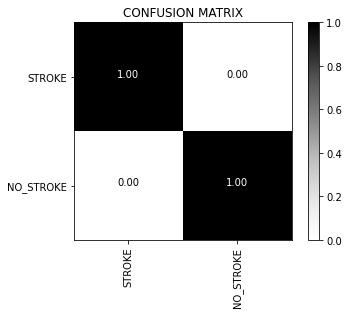

<Figure size 1296x1152 with 0 Axes>

In [222]:
LABELS = ['STROKE', 'NO_STROKE']

plot_confusion_matrix(random_forest_en, X_train, y_train, class_names=LABELS, file_name='ConfussionMatrix', normalize=True)


CONFUSION MATRIX


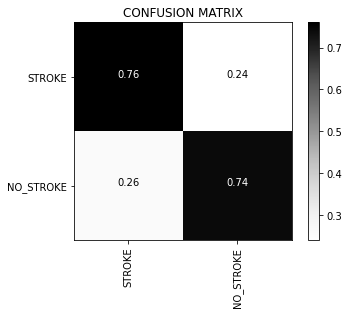

<Figure size 1296x1152 with 0 Axes>

In [223]:
plot_confusion_matrix(random_forest_en, X_test, y_test, class_names=LABELS, file_name='ConfussionMatrix', normalize=True)